## ข้อ 1.

In [1]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv"
df = pd.read_csv(url)

data = df.values

print(len(data))

2820


## ข้อ 2.

In [2]:
data

array([['1749-01', 58.0],
       ['1749-02', 62.6],
       ['1749-03', 70.0],
       ...,
       ['1983-10', 55.8],
       ['1983-11', 33.3],
       ['1983-12', 33.4]], dtype=object)

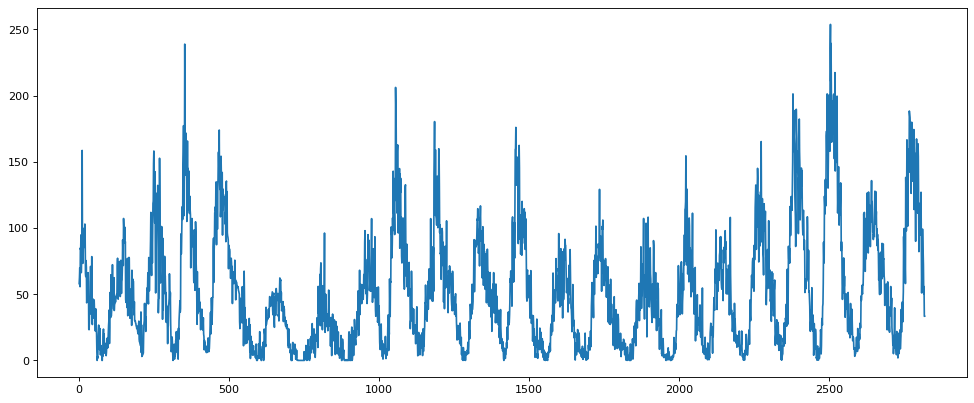

In [3]:
import matplotlib.pyplot as plt

#### Plot graph
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(df['Sunspots'])

## ข้อ 3.

In [4]:
df=df.drop(columns=['Month'])
df

,Sunspots
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df.values.reshape(-1, 1))
df

array([[0.2285264 ],
       [0.24665091],
       [0.27580772],
       ...,
       [0.21985816],
       [0.13120567],
       [0.13159968]])

In [6]:
n=int(len(df)*0.8)
n

2256

In [7]:
train_data=df[:n]
test_data=df[n:]
train_data.shape

(2256, 1)

In [8]:
test_data.shape

(564, 1)

## ข้อ 4.

In [9]:
def GenXY(dat, timstep):
  X, Y = [], []
  for i in range(len(dat) - time_steps):
    X.append(dat[i : i + time_steps])
    Y.append(dat[i + time_steps])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

time_steps = 12
trainX, trainY = GenXY(train_data, time_steps)
testX, testY = GenXY(test_data, time_steps)


In [10]:
trainX.shape

(2244, 12, 1)

In [11]:
trainY.shape

(2244, 1)

In [12]:
testX.shape

(552, 12, 1)

In [13]:
testY.shape

(552, 1)

## ข้อ 5.

In [14]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
model = Sequential([
  Input(shape=(time_steps, 1)),
  SimpleRNN(32, activation = 'tanh'),
  Dense(1, activation = 'sigmoid')
  ])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, epochs=50, validation_split = 0.1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0525 - val_loss: 0.0111
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - val_loss: 0.0047
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val

## ข้อ 6.

In [15]:
from sklearn.metrics import mean_squared_error

test_predict = model.predict(testX)


test_rmse = mean_squared_error(testY, test_predict)

print('Test RMSE: %.3f RMSE' % (test_rmse))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Test RMSE: 0.007 RMSE


## ข้อ 7.

In [16]:
from tensorflow.keras.layers import GRU

In [17]:
model = Sequential([
  Input(shape=(time_steps, 1)),
  GRU(32, activation = 'tanh'),
  Dense(1, activation = 'sigmoid')
  ])

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, epochs=50, validation_split = 0.1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 32)             │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0952 - val_loss: 0.0159
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0200 - val_loss: 0.0049
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057 - val_loss: 0.0047
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0054 - val_loss: 0.0045
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

In [18]:
from sklearn.metrics import mean_squared_error

test_predict = model.predict(testX)


test_rmse = mean_squared_error(testY, test_predict)

print('Test RMSE: %.3f RMSE' % (test_rmse))

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Test RMSE: 0.006 RMSE


## ข้อ 8.

In [19]:
def GenXY(dat, timstep):
  X, Y = [], []
  for i in range(len(dat) - time_steps - output_length + 1):
    X.append(dat[i : i + time_steps])
    Y.append(dat[i+ time_steps : i + time_steps +output_length])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

time_steps = 5
output_length = 3
trainX, trainY = GenXY(train_data, time_steps)
testX, testY = GenXY(test_data, time_steps)

In [20]:
trainX.shape

(2249, 5, 1)

In [21]:
trainY.shape

(2249, 3, 1)

In [22]:
testX.shape

(557, 5, 1)

In [23]:
testY.shape

(557, 3, 1)

## ข้อ 9.

In [24]:
from tensorflow.keras.layers import Input, LSTM, Dense
model = Sequential([
  Input(shape=(time_steps, 1)),
  LSTM(64, activation = 'tanh'),
  Dense(output_length, activation = 'sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=100, validation_split = 0.1)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0962 - val_loss: 0.0169
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0271 - val_loss: 0.0078
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0053
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0059 - val_loss: 0.0055
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0062 - val_loss: 0.0051
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss:

## ข้อ 10.

In [25]:
from sklearn.metrics import mean_squared_error

test_predict = model.predict(testX)

# Reshape testY and test_predict to be 2D arrays
testY_reshaped = testY.reshape(-1, output_length)
test_predict_reshaped = test_predict.reshape(-1, output_length) # test_predict is now already in the correct shape

test_rmse = mean_squared_error(testY_reshaped, test_predict_reshaped)

print('Test RMSE: %.3f RMSE' % (test_rmse))

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Test RMSE: 0.008 RMSE


## ข้อ 11.

In [26]:
!pip install yfinance

# Create Sequential dataset for Many to One
input length = 12
output length = 1

In [27]:
def GenXY(dat):
  X, Y = [], []
  for i in range(len(dat) - 12):
    X.append(dat[i : i + 12])
    Y.append(dat[i + 12])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

## ข้อ 12.

In [28]:
import yfinance as yf
stock = yf.Ticker("PTT.BK")
stock_data = stock.history(period="max")

## ข้อ 13.

In [29]:
data= stock_data['Close']
data

,Close
Date,
2001-12-06 00:00:00+07:00,1.232156
2001-12-07 00:00:00+07:00,1.223539
2001-12-10 00:00:00+07:00,1.223539
2001-12-11 00:00:00+07:00,1.171841
2001-12-12 00:00:00+07:00,1.206306
...,...
2025-10-06 00:00:00+07:00,32.000000
2025-10-07 00:00:00+07:00,32.000000
2025-10-08 00:00:00+07:00,32.000000


In [30]:
data = data.reset_index()
data = data.drop(columns=['Date'])
data

,Close
0,1.232156
1,1.223539
2,1.223539
3,1.171841
4,1.206306
...,...
5881,32.000000
5882,32.000000
5883,32.000000
5884,32.000000


In [31]:
n=int(len(data)*0.8)
n

4708

In [32]:
train=data[:n]
test=data[n:]
train.shape

(4708, 1)

In [33]:
test.shape

(1178, 1)

In [34]:
def GenXY(dat):
  X, Y = [], []
  for i in range(len(dat) - 7):
    X.append(dat[i : i + 7])
    Y.append(dat[i + 7])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

In [35]:
xTrain,yTrain=GenXY(train.values)
xTest,yTest=GenXY(test.values)

In [36]:
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.models import Sequential
model = Sequential([
  Input(shape=(7, 1)),
  GRU(60, activation = 'tanh'),
  Dense(1, activation = 'sigmoid')
  ])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xTrain, yTrain, epochs=100)

Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 317.1927
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 331.5202
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 319.6504
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 317.2948
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 316.3535
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 329.2053
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 324.4692
Epoch 8/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 315.5547
Epoch 9/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 321.7705
Epoch 10/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 310.5888
Epoch 11/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 314.3700
Epoch 12/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 320.4294
Epoch 13/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 326.3798
Epoch 14/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 324.0334
Epoch 

## ข้อ 14.

In [37]:
from sklearn.metrics import r2_score

predictions = model.predict(xTest)
r2 = r2_score(yTest, predictions)
print(f"R square (r2): {r2}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
R square (r2): -354.0996517574837


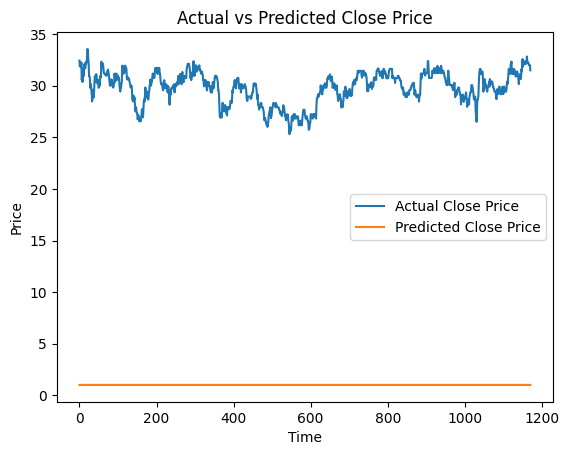

In [38]:
import matplotlib.pyplot as plt
plt.plot(yTest, label='Actual Close Price')
plt.plot(predictions, label='Predicted Close Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Price')
plt.show()

## ข้อ 15.

In [39]:
def GenXY(dat, timstep):
  X, Y = [], []
  for i in range(len(dat) - time_steps - output_length + 1):
    X.append(dat[i : i + time_steps])
    Y.append(dat[i+ time_steps : i + time_steps +output_length])
  X = np.array(X)
  Y = np.array(Y)
  return X,Y

time_steps = 30
output_length = 5
trainX, trainY = GenXY(train, time_steps)
testX, testY = GenXY(test, time_steps)

## ข้อ 16.

In [40]:
pip install scikeras

In [41]:
pip install --upgrade scikit-learn scikeras

In [42]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

param_grid = {
    'model__hidden_units': [10, 20, 30, 50, 100]
}

In [43]:
def create_model(hidden_units=50):
    model = Sequential([
        Input(shape=(7, 1)),
        GRU(hidden_units, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [47]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(hidden_units=50):
    model = Sequential([
        Input(shape=(7, 1)),
        GRU(hidden_units, activation='tanh'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

trainX = np.random.rand(200, 7, 1)
trainY = np.random.rand(200)

model = KerasRegressor(
    model=create_model,
    epochs=20,
    batch_size=16,
    verbose=0,
    X_shape_=(7, 1)
)

param_grid = {
    'model__hidden_units': [10, 20, 30, 50, 100]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(trainX, trainY)

print("Best hidden_units:", grid_result.best_params_['model__hidden_units'])
print("Best score:", grid_result.best_score_)


Best hidden_units: 30
Best score: -0.048147437988205866
